<a href="https://colab.research.google.com/github/logkong/Step-by-step/blob/main/04_TensorFlow%EB%A1%9C_CNN%EB%AA%A8%EB%8D%B8_%EA%B5%AC%EC%B6%95%ED%95%98%EA%B8%B0_%EB%AC%B8%EC%A0%9C_%EB%A1%9C%EC%BD%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow로 CNN 모델 구축하자!

----

이번 미션에서는 Google에서 만든 딥러닝 프레임워크인 TensorFlow를 활용해서 CNN 모델인 AlexNet과 VGGNet을 만들고 학습시킬 예정입니다. 우리가 사용할 데이터셋은 MNIST입니다.

우리가 본격적으로 공부하기 앞서 구글 코랩으로 GPU 환경설정을 진행해보도록 하겠습니다. 이번 프로젝트는 딥러닝을 사용하기 때문에 GPU를 사용해야 훨씬 빠른 속도로 학습이 가능합니다.



# 학습목표
- 이미지 분류모델을 활용한 다양한 사례를 찾고 적용할 수 있다. 
- AI모델의 주요 개념을 이해하고 스스로 표현할 수 있다.
- 실습코드에서 레이어를 변경하여 성능을 향상시킬 수 있다.

# 미션
1. TensorFlow에서 사용하는 CNN 메서드 탐구하기
2. 데이터셋, 데이터 정규화, 모델, loss, accuracy의 개념을 정리하기 
3. VGGNet 그림을 보고 직접 만들어보기

# 환경설정

1. 코랩 상단 메뉴에서 런타임 - 런타임 유형 변경을 눌러주세요
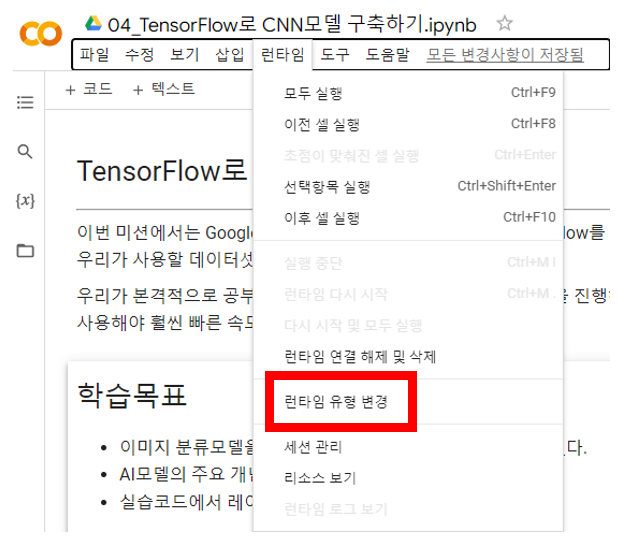



2. 하드웨어 가속기를 None에서 GPU로 바꿔주세요.\
(코랩 프로를 결제하셨다면 GPU를 고를 수 있지만 무료로 사용하시는 분들은 T4로 고정되어 있습니다)


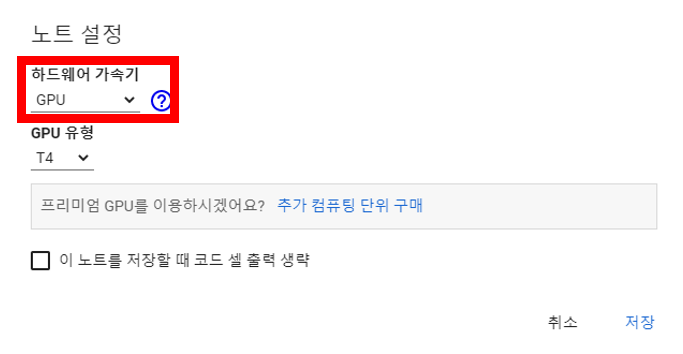

# MNIST를 활용한 간단한 CNN 모델 만들기

## MNIST알아보기
본격적인 미션에 앞서 먼저 MNIST에 대해 알아보도록 하겠습니다.\
MNIST는 0부터 9까지 숫자 손글씨로 이루어진 데이터셋으로 되어 있습니다\
28X28사이즈의 60000의 훈련 데이터와 10000개의 테스트 데이터로 구성되어 있습니다.

자세한 내용은 [TensorFlow 홈페이지에 있는 내용](https://www.tensorflow.org/datasets/catalog/mnist?hl=ko)을 참고해주세요

- x_train.shape == (60000, 28, 28)  
- x_test.shape == (10000, 28, 28)  
- y_train.shape == (60000,)  
- y_test.shape == (10000,)   

In [ ]:
# 인공지능 학습에 필요한 라이브러리 tensorflow 설치
!pip install tensorflow
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


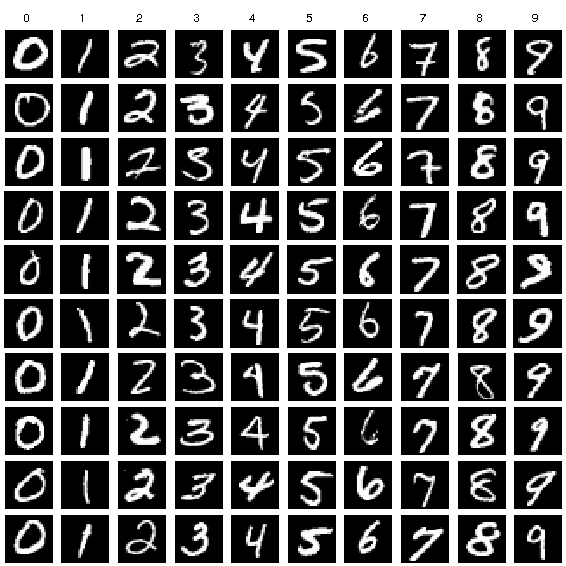

In [ ]:
# tensorflow 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [ ]:
# Keras API를 활용해서 MNIST 불러오기
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 데이터 확인해보기
---
데이터를 직접 확인해봅시다.\
train_image를 직접 실행해보기도 하고 시각화를 거쳐 데이터를 확인해봐요

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5 입니다.


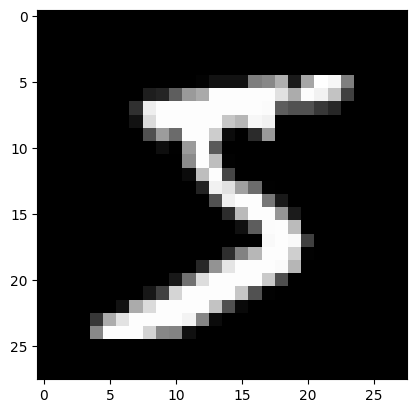

In [ ]:
# 시각화해서 확인하기
plt.imshow(train_images[0],cmap='gray')
print(train_labels[0],'입니다.')

## 데이터 전처리 - 정규화하기
---

데이터를 직접 확인했으면 이제 우리는 정규화를 진행합니다.\
정규화를 진행하는 이유는 우리가 앞서 이미지 1개를 시각화없이 출력했는데 그걸 통해서 알 수 있습니다.\
이미지를 직접 출력한 결과를 보면 0인 경우가 대부분인데 그 다음 심심치 않게 보이는 단위가 3자리수입니다. 0과 3자리수의 크기는 차이가 많이 나는데 이럴 경우 오버피팅이 될 우려가 있습니다.\
그렇기에 오버피팅을 막기 위해 데이터의 분포를 정규화시켜 scale을 줄이는 데 초점이 맞춰져있습니다.

그렇다면 우리는 데이터를 정규화시켜 데이터의 scale을 줄이고 오버피팅을 방지하도록 하겠습니다.

In [ ]:
print('최소값:',np.min(train_images))
print('최대값:',np.max(train_images))

최소값: 0
최대값: 255


In [ ]:
# 픽셀 값 범위를 [0, 255]에서 [0, 1]로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
print('최소값:',np.min(train_images))
print('최대값:',np.max(train_images))

최소값: 0.0
최대값: 1.0


## 모델 정의 - TensorFlow를 이용한 CNN 모델 만들기
---
데이터는 이제 준비가 완료되었습니다.\
그렇다면 이제 CNN 모델에 필요한 layer들을 하나씩 보도록 하겠습니다.


### Convolution Neural Network 뽀개기
미션 1의 주인공 Convolution Neural Network(CNN) layer부터 살펴봅시다.

- [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

Convolution Neural Network를 구성하고 있는 매개변수(Arguments)는 filters부터 bias_contraint까지 총 16개로 구성되어 있습니다. 그중에서 중점적으로 봐야 하는 메소드는 filters, kernel_size, strides, padding,input_shape, activation 총 5가지입니다. 해당 내용을 하나씩 알아보도록 하겠습니다.

우선 **filters**는 출력되는 결과의 차원수를 의미합니다. 한번 예제를 같이 보도록 하겠습니다.


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu')(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 2, activation = 'relu')(x)
print(y.shape)

(4, 27, 27, 2)


위에 있는 예시코드에서 filter가 영향을 준 부분은 Tuple의 마지막 부분인 channel파트입니다\
즉 filter를 몇개 주는지에 따라서 channel수가 바뀌게 되고 이는 차원수가 바뀌는 것을 의미합니다.

그렇다면 **kernel_size**에 대해서도 알아보도록 하겠습니다. 위에 있는 코드를 보시면 kernel_size가 위에 있는 코드는 3, 아래에 있는 코드는 2로 되어 있습니다. 그래서 output이 바뀐 파트는 Tuple의 2번째, 3번째에 영향을 줍니다. 그렇다면 kernel_size가 왜 3일때 28에서 26으로 변하고 2일때 28에서 27로 바뀔까요?

그것은 Convolution 연산방식을 이해하면 쉽게 도출됩니다.

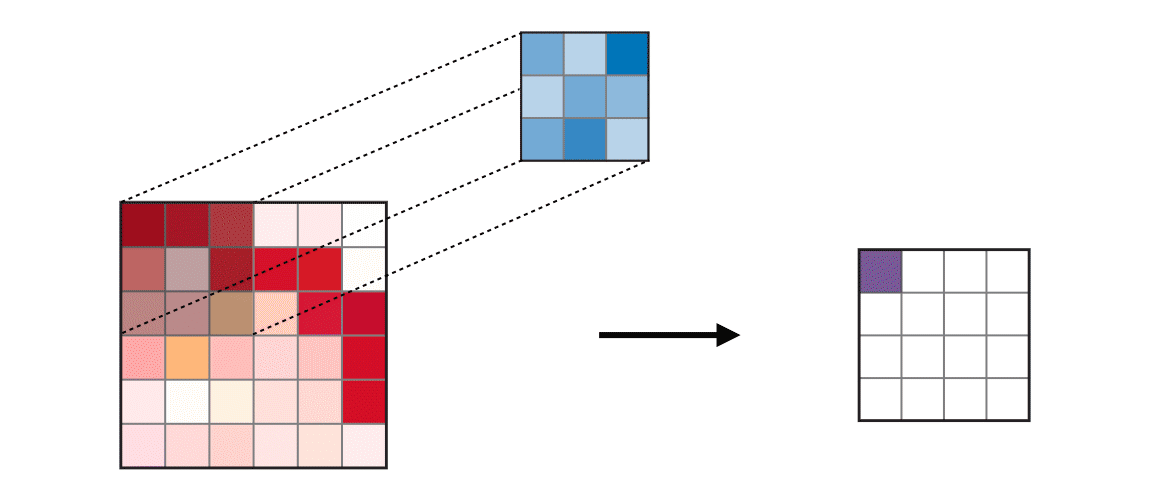

위에 있는 gif를 보게 되면 빨간색 6x6 이미지를 3x3 filter를 이용해 convolution 연산이 진행되고 결과값은 보라색 이미지인 4x4이미지입니다.

해당 방식을 수학적으로 표현하면 다음과 같이 표현가능합니다.

$$ output = input - filter + 1 $$

그다음 알아볼 매개변수는 **strides**입니다.\
strides는 filter 이동을 1개씩 가는 것이 아니라 n개씩 가도록 설정하는 매개변수입니다. 이것도 그림으로 먼저 보도록 하겠습니다. 

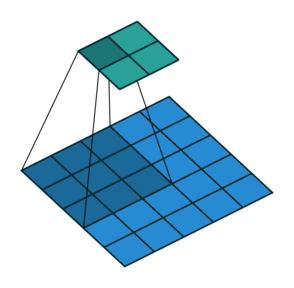


위에 있는 그림을 보게 되면 5x5 이미지를 3x3 filter가 2개씩 가도록 설정되어 있습니다.\
해당 설정을 하지 않았다면 output의 크기는 3x3이 되어야 하지만 stride가 설정되면서 2x2로 출력값이 나오게 되었습니다. 해당 내용도 코드로도 확인해보도록 하겠습니다. 

In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu')(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, strides = 2, activation = 'relu')(x)
print(y.shape)

(4, 13, 13, 2)


stride가 적용되면 실제 output의 크기는 step만큼 나누어져서 계산됩니다. \
그렇기에 stride가 적용된 output_shape은 다음과 같습니다.

$$
output = \frac{(input-filter)}{stride} + 1
$$


이제 **padding**에 대해 알아보도록 하겠습니다.\
padding을 하는 이유를 알고 싶다면 상단에 있는 그림을 다시 한번 보면 이유를 충분히 알 수 있습니다.\
filter는 가운데 파트는 몇번씩 거치면서 계산되지만 끝에 있는 edge부분은 한번밖에 계산되지 않습니다. 그렇기에 padding을 주어서 edge를 잘 볼 수 있게 하는 장치입니다.

TensorFlow의 경우 padding은 '자동'으로 적용하며 'valid'는 적용하지 않은 것이며 'same'은 padding이 적용된 상황입니다.

In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu')(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu', padding = 'same')(x)
print(y.shape)

(4, 28, 28, 2)


padding이 적용되었을 때 Output shape은 다음과 같이 계산됩니다.

$$
output = \frac{(input - filter + 2*padding)}{stride}+1
$$


마지막으로 알아볼 매개변수는 **input_shape**과 **activation**입니다.

input_shape은 처음 layer를 쌓을 떄 설정해주는 값이며 activation은 convolution 연산 이후 활성화함수를 고르는 매개변수입니다.

### 미션 1. TensorFlow로 모델 architecture 직접 만들기

이제 TensorFlow로 모델을 직접 설계해보세요. 아래 지시대로 모델을 직접 만들어주세요.

In [ ]:
from tensorflow import keras

# 모델 아키텍처 정의
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
#MaxPooling2D layer를 추가하고 pooling size를 (2,2)로 지정해주세요 (참고자료 : https://keras.io/api/layers/pooling_layers/max_pooling2d/)
model.add(keras.layers.MaxPooling2D((2,2)))
#Convolution layer를 추가하고 output 차원수를 32, filter 사이즈를 3, 활성화함수를 relu로 설정해주세요
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
# 다시한번 Maxpooling2D layer를 추가해주세요
model.add(keras.layers.MaxPooling2D(2,2))
# 모델의 차원을 줄여주세요 (참고자료 : https://keras.io/api/layers/reshaping_layers/flatten/)
model.add(keras.layers.Flatten())
# Dense layer를 쌓고 output unit을 32로 넣고 활성화함수를 relu로 설정해주세요. (참고자료 : https://keras.io/api/layers/core_layers/dense/)
model.add(keras.layers.Dense(32, activation='relu'))
# Dense Layer를 쌓되 output unit을 우리의 분류할 품목 숫자대로 넣어주세요.
model.add(keras.layers.Dense(10, activation='relu'))


In [ ]:
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

이제 모델을 컴파일한 다음 모델 학습을 진행하도록 하겠습니다!

In [ ]:
# 모델 컴파일. 손실 함수, 옵티마이저, 메트릭 정의
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# 훈련 데이터를 이용해 모델 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6434 - accuracy: 0.7612
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5180 - accuracy: 0.7888
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4992 - accuracy: 0.7930
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4900 - accuracy: 0.7954
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4839 - accuracy: 0.7964
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4786 - accuracy: 0.7977
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4752 - accuracy: 0.7985
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4722 - accuracy: 0.7989
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4690 - accuracy: 0.7994
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.46

In [ ]:
# 테스트 데이터로 모델 평가. 손실과 정확도 출력
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 loss:', test_loss, '테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.5005 - accuracy: 0.7901 - 800ms/epoch - 3ms/step
테스트 loss: 0.5004591345787048 테스트 정확도: 0.7900999784469604


313/313 [==============================] - 1s 2ms/step


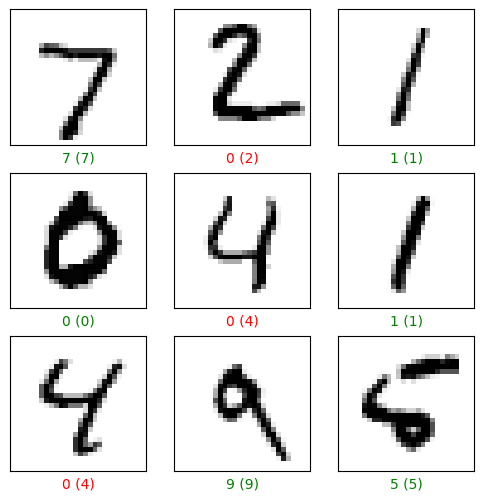

In [ ]:
# 예측 결과 시각화
predictions = model.predict(test_images)
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()

# 미션 2. Fashion MNIST을 CNN모델을 만들어서 학습시키고 잘나왔는지 확인해보자!
---

이번 미션은 Fashion MNIST를 직접 불러오고 CNN 모델을 만들 예정입니다.\
코드 가이드라인을 잘 따라오신다면 여러분들도 충분히 만들 수 있습니다!!

In [ ]:
#Fashion MNIST를 직접 불러오자! (참고자료 : https://keras.io/api/datasets/fashion_mnist/)
fashion_mnist = keras.datasets.fashion_mnist
(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()


In [ ]:
#label이 숫자로 되어 있으니 영어로 된 리스트를 드리겠습니다.
label_list = ['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

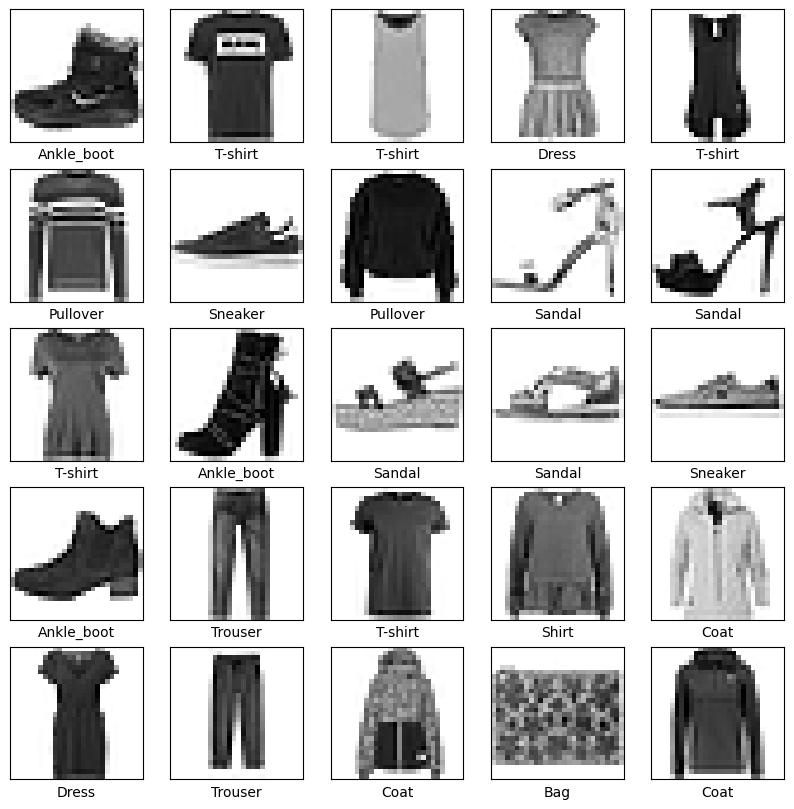

In [ ]:
# 불러온 데이터를 시각화해주세요. (25개 데이터 시각화)
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(train_fashion_images[i], cmap=plt.cm.binary)
    plt.xlabel(label_list[train_fashion_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
# 픽셀 값 범위를 [0, 255]에서 [0, 1]로 정규화를 진행해주세요!
train_fashion_images = train_fashion_images / 255.0 
test_fashion_images = test_fashion_images / 255.0

model.summary()를 진행했을때 아래와 같은 내용으로 나오게끔 만들어주세요!
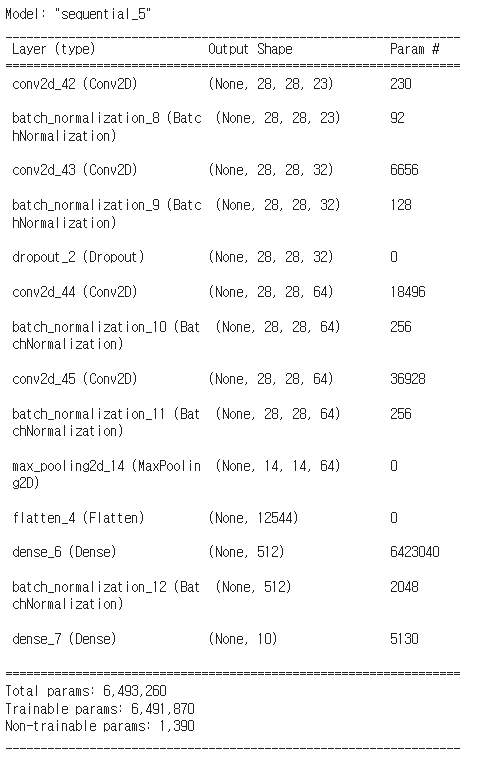

In [ ]:
# Summary를 보고 모델 만들기
# 마지막 Dense는 softmax가 활성화함수이며 나머지 layer들은 relu입니다.
# 모든 CNN은 padding을 갖고 있습니다.
# 참고자료 : (https://keras.io/api/layers/normalization_layers/batch_normalization/)
# 참고자료 : (https://keras.io/api/layers/regularization_layers/dropout/)

from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential()
model.add(Conv2D(23, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 23)        230       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 23)       92        
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        6656      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)       

In [ ]:
# 모델을 컴파일하고 학습시켜주세요.
# 옵티마이저는 'adam'
# loss는 SparseCategoricalCrossentropy
# 평가지표는 정확도
# epoch은 5

# 모델 컴파일. 손실 함수, 옵티마이저, 메트릭 정의
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

model.fit(train_fashion_images, train_fashion_labels, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 25s 10ms/step - loss: 0.3668 - accuracy: 0.8695
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2520 - accuracy: 0.9096
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2106 - accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1733 - accuracy: 0.9355
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1418 - accuracy: 0.9481


In [ ]:
# 테스트 데이터로 모델 평가. 손실과 정확도 출력
test_loss, test_acc = model.evaluate(test_fashion_images, test_fashion_labels, verbose=2)
print('테스트 loss:', test_loss, '테스트 정확도:', test_acc)

313/313 - 2s - loss: 0.2552 - accuracy: 0.9234 - 2s/epoch - 5ms/step
테스트 loss: 0.2552092671394348 테스트 정확도: 0.9233999848365784


313/313 [==============================] - 1s 2ms/step


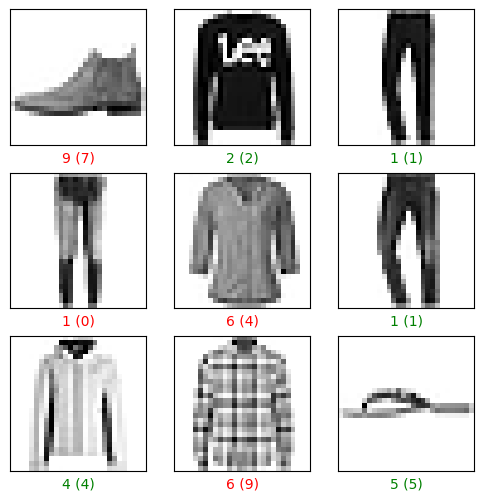

In [ ]:
# 위의 내용을 바탕으로 예측 결과 시각화
# 예측 결과 시각화
predictions = model.predict(test_fashion_images)
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_fashion_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()

# 보너스 미션 : Fashion MNIST의 SOTA 모델로 성능 업그레이드해보자!
---
우리가 미션2에서 보았던 Fashion MNIST 분류문제중에서 제일 성능이 좋은 모델을 찾으려면 어떻게 해야 할까요?

바로... Papers With Code라는 사이트를 이용하시면 됩니다. Papers With Code는 데이터셋에 대한 정보와 해당 데이터셋과 특정 task에서 최고의 성능을 보여주는 모델 (State Of The Art)을 보여줍니다.

[해당 사이트](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)에 들어가셔서 Fashion MNIST 이미지 분류모델중에서 SOTA를 확인하고 한번 구현해보세요!!

이번 미션도 수고하셨습니다!!